In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics #

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mhmmd-nauman/DataSets/master/wdbc/csv/wdbc-complete.csv")

print(df.head)

<bound method NDFrame.head of      Mean Radius  Mean Texture  ...  Worst Fractal Dimension  Diagnosis
0          17.99         10.38  ...                  0.11890          M
1          20.57         17.77  ...                  0.08902          M
2          19.69         21.25  ...                  0.08758          M
3          11.42         20.38  ...                  0.17300          M
4          20.29         14.34  ...                  0.07678          M
..           ...           ...  ...                      ...        ...
564        21.56         22.39  ...                  0.07115          M
565        20.13         28.25  ...                  0.06637          M
566        16.60         28.08  ...                  0.07820          M
567        20.60         29.33  ...                  0.12400          M
568         7.76         24.54  ...                  0.07039          B

[569 rows x 31 columns]>


In [ ]:
#df=df[df.columns[:-1]]

In [ ]:
df.head()

,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Fractal Dimension,Radius SE,Texture SE,Perimeter SE,SE Area,SE Smoothness,SE Compactness,SE Concavity,SE Concave Points,SE Symmetry,SE Fractal Dimension,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [ ]:
#df['Application Status'] = df['Application Status'].map({'Complete':1,'NotComplete':0})
#df['Offered'] = df['Offered'].map({'Yes':1,'No':0})
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
#df['Application Status'] = labelencoder_X_1.fit_transform(df['Application Status'])
#df['Domicile'] = labelencoder_X_1.fit_transform(df['Domicile'])
#df['Gender'] = labelencoder_X_1.fit_transform(df['Gender'])
#df['Province'] = labelencoder_X_1.fit_transform(df['Province'])
df['Diagnosis'] = labelencoder_X_1.fit_transform(df['Diagnosis'])

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
df = clean_dataset(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


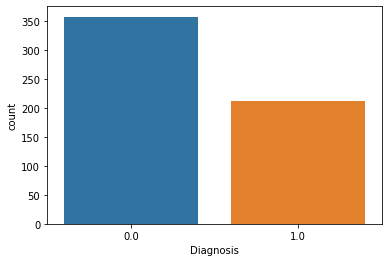

In [ ]:
sns.countplot(df['Diagnosis'],label="Count")

In [ ]:
X = df.drop('Diagnosis',axis=1)
y = df.Diagnosis

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=0)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (398, 30)
X_test:  (171, 30)
y_train:  (398,)
y_test:  (171,)


In [ ]:
#NB
model = GaussianNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9239766081871345


In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
Sp = tn / (tn+fp)
Sn = tp/(tp + fn)

In [ ]:
print(cm)
print(Sp)
print(Sn)

[[101   7]
 [  6  57]]
0.9351851851851852
0.9047619047619048


In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(y_test, y_pred)
print(cohen_score)

0.5819477434679334


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
models = []
models.append(( ' LR ' , LogisticRegression()))
#models.append(( ' LDA ' , LinearDiscriminantAnalysis()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' RF ' , RandomForestClassifier()))
models.append(( ' NB ' , GaussianNB()))
#models.append(( ' SVM ' , SVC()))

results = []
names = []

for name, model in models:
    Kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=Kfold, scoring= 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std());
    print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

 LR : 0.949095 (0.035320)
 KNN : 0.919683 (0.035653)
 RF : 0.976471 (0.022866)
 NB : 0.941252 (0.035118)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipelines = []
#pipelines.append(( ' ScaledLR ' , Pipeline([( 'Scaler' , StandardScaler()),( ' LR ' ,
#LogisticRegression())])))
#pipelines.append(( ' ScaledLDA ' , Pipeline([( 'Scaler' , StandardScaler()),( ' LDA ' ,
#LinearDiscriminantAnalysis())])))
pipelines.append(( ' ScaledKNN ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' KNN ' ,
KNeighborsClassifier())])))
pipelines.append(( ' ScaledRF ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' RandomForest ' ,
RandomForestClassifier())])))
pipelines.append(( ' ScaledNB ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' NB ' ,
GaussianNB())])))
#pipelines.append(( ' ScaledSVM ' , Pipeline([( ' Scaler' , StandardScaler()),( ' SVM ' , SVC())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 ScaledKNN : 0.964744 (0.022893)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


 ScaledRF : 0.982353 (0.018498)
 ScaledNB : 0.933446 (0.033072)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
